In [136]:
import pandas as pd
import numpy as np
import collections

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
train = pd.read_csv('train.csv')
train

,pair_id,name_1,name_2,is_duplicate
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.",0
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,0
2,3,"Rishichem Distributors Pvt., Ltd.",Dsa,0
3,4,Powermax Rubber Factory,Co. One,0
4,5,Tress A/S,Longyou Industries Park Zhejiang,0
...,...,...,...,...
497814,497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,0
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,0
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City",0
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,0


In [141]:
def compute_tf(text):
    tf_text = collections.Counter(text)
    for i in tf_text:
        tf_text[i] = tf_text[i]/float(len(text))
    return tf_text

In [142]:
def counter(idf_dictionary, list2):
    counter, length = 0, 0
    for word in idf_dictionary:
        length += idf_dictionary[word]
        if word in list2:
            counter += idf_dictionary[word]
    return counter/length

In [143]:
def repeatability(list1, list2):
    counter = 0
    for word in list1:
        if word in list2:
            counter += 1
    return counter/len(list1)

In [144]:
train_data = train

train_data['name_1_list'] = train_data['name_1'].str.replace(r'[^\w\s]+', '').str.lower().str.split()
train_data['name_2_list'] = train_data['name_2'].str.replace(r'[^\w\s]+', '').str.lower().str.split()

is_duplicate = train_data.pop('is_duplicate')
train_data.insert(len(train_data.columns), 'is_duplicate', is_duplicate)

train_data

C:\Users\7A4E~1\AppData\Local\Temp/ipykernel_7208/1214456815.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['name_1_list'] = train_data['name_1'].str.replace(r'[^\w\s]+', '').str.lower().str.split()
C:\Users\7A4E~1\AppData\Local\Temp/ipykernel_7208/1214456815.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['name_2_list'] = train_data['name_2'].str.replace(r'[^\w\s]+', '').str.lower().str.split()


,pair_id,name_1,name_2,name_1_list,name_2_list,is_duplicate
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.","[iko, industries, ltd]","[enormous, industrial, trade, pvt, ltd]",0
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,"[apcotex, industries, ltd]","[technocraft, industries, india, ltd]",0
2,3,"Rishichem Distributors Pvt., Ltd.",Dsa,"[rishichem, distributors, pvt, ltd]",[dsa],0
3,4,Powermax Rubber Factory,Co. One,"[powermax, rubber, factory]","[co, one]",0
4,5,Tress A/S,Longyou Industries Park Zhejiang,"[tress, as]","[longyou, industries, park, zhejiang]",0
...,...,...,...,...,...,...
497814,497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,"[bitmat, products]","[the, goodyear, tire, and, rubber, company]",0
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,"[bnd, trading, co, ltd]","[zhong, shan, yue, liang, economy, trade, imp,...",0
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City","[xeikon, industrial, co, ltd, of, dongguan, city]","[yi, cheng, trading, co, ltd, of, dongguan, city]",0
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,"[shanghai, kechuan, trading, co, ltd]","[shanghai, mg, stationery, inc]",0


In [145]:
corpus1 = train_data["name_1_list"].tolist()
corpus2 = train_data["name_2_list"].tolist()

corpus_name = []
for name in corpus1:
    corpus_name.extend(name)
for name in corpus2:
    corpus_name.extend(name)    
    
tf_name = compute_tf(corpus_name)
tf_name

Counter({'iko': 0.0003050301658921795,
         'industries': 0.018474687350822448,
         'ltd': 0.07483083097121497,
         'apcotex': 0.0001162404964628907,
         'rishichem': 1.2675877804537964e-05,
         'distributors': 0.0002206142137045118,
         'pvt': 0.01149594237060491,
         'powermax': 1.1057680638001202e-05,
         'rubber': 0.010603506633259886,
         'factory': 0.00030745746164198464,
         'tress': 6.52672857169827e-05,
         'as': 0.0009555454268399576,
         'wpt': 4.018522963566291e-05,
         'mexico': 0.005952807976633233,
         'sa': 0.01742744408454541,
         'de': 0.024545084321557352,
         'cv': 0.012511630792134482,
         'national': 0.0004975956287100542,
         'bank': 0.0013061548129229227,
         'of': 0.0017805562822459497,
         'citibank': 1.2406178276781837e-05,
         'korea': 9.547363282566893e-05,
         'inc': 0.026435678011127804,
         'prettl': 4.8545914996102845e-06,
         'electric

In [146]:
def compute_idf(text, tf_name=tf_name):
    idf_dictionary = {}
    for word in text:
        idf_dictionary[word] = round(1/tf_name[word], 1)
    return idf_dictionary

In [147]:
train_data['idf_name_1'] = train_data['name_1_list'].apply(compute_idf)
train_data['idf_name_2'] = train_data['name_2_list'].apply(compute_idf)

train_data['name_1_match'] = train_data.apply(lambda x: counter(x.idf_name_1, x.name_2_list), axis=1)
train_data['name_2_match'] = train_data.apply(lambda x: counter(x.idf_name_2, x.name_1_list), axis=1)

train_data['name_match'] = (train_data['name_1_match'] + train_data['name_2_match'])/2

train_data['repeatability'] = train_data.apply(lambda x: repeatability(x.name_1_list, x.name_2_list), axis=1)

train_data

,pair_id,name_1,name_2,name_1_list,name_2_list,is_duplicate,idf_name_1,idf_name_2,name_1_match,name_2_match,name_match,repeatability
0,1,Iko Industries Ltd.,"Enormous Industrial Trade Pvt., Ltd.","[iko, industries, ltd]","[enormous, industrial, trade, pvt, ltd]",0,"{'iko': 3278.4, 'industries': 54.1, 'ltd': 13.4}","{'enormous': 40302.5, 'industrial': 182.6, 'tr...",0.004005,0.000327,0.002166,0.333333
1,2,Apcotex Industries Ltd.,Technocraft Industries (India) Ltd.,"[apcotex, industries, ltd]","[technocraft, industries, india, ltd]",0,"{'apcotex': 8602.9, 'industries': 54.1, 'ltd':...","{'technocraft': 29662.6, 'industries': 54.1, '...",0.007785,0.002263,0.005024,0.666667
2,3,"Rishichem Distributors Pvt., Ltd.",Dsa,"[rishichem, distributors, pvt, ltd]",[dsa],0,"{'rishichem': 78890.0, 'distributors': 4532.8,...",{'dsa': 2107.9},0.000000,0.000000,0.000000,0.000000
3,4,Powermax Rubber Factory,Co. One,"[powermax, rubber, factory]","[co, one]",0,"{'powermax': 90434.9, 'rubber': 94.3, 'factory...","{'co': 23.0, 'one': 1456.9}",0.000000,0.000000,0.000000,0.000000
4,5,Tress A/S,Longyou Industries Park Zhejiang,"[tress, as]","[longyou, industries, park, zhejiang]",0,"{'tress': 15321.6, 'as': 1046.5}","{'longyou': 36351.3, 'industries': 54.1, 'park...",0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
497814,497815,BIT-MAT PRODUCTS,The Goodyear Tire and Rubber Company,"[bitmat, products]","[the, goodyear, tire, and, rubber, company]",0,"{'bitmat': 16334.1, 'products': 166.7}","{'the': 675.7, 'goodyear': 4017.2, 'tire': 929...",0.000000,0.000000,0.000000,0.000000
497815,497816,"Bnd Trading Co., Ltd.",Zhong Shan Yue Liang Economy& Trade Imp. & Exp...,"[bnd, trading, co, ltd]","[zhong, shan, yue, liang, economy, trade, imp,...",0,"{'bnd': 17165.9, 'trading': 66.3, 'co': 23.0, ...","{'zhong': 27263.5, 'shan': 5296.9, 'yue': 9914...",0.002108,0.000406,0.001257,0.500000
497816,497817,"Xeikon Industrial Co., Ltd. Of Dongguan City","Yi Cheng Trading Co., Ltd. Of Dongguan City","[xeikon, industrial, co, ltd, of, dongguan, city]","[yi, cheng, trading, co, ltd, of, dongguan, city]",0,"{'xeikon': 66211.2, 'industrial': 182.6, 'co':...","{'yi': 3628.0, 'cheng': 5444.7, 'trading': 66....",0.028508,0.175724,0.102116,0.714286
497817,497818,"Shanghai Kechuan Trading Co., Ltd.",Shanghai M&G Stationery Inc.,"[shanghai, kechuan, trading, co, ltd]","[shanghai, mg, stationery, inc]",0,"{'shanghai': 168.0, 'kechuan': 41198.1, 'tradi...","{'shanghai': 168.0, 'mg': 10186.3, 'stationery...",0.004051,0.006707,0.005379,0.200000


In [148]:
X = train_data.drop(columns = ['pair_id', 
                               'name_1', 
                               'name_2', 
                               'name_1_list', 
                               'name_2_list', 
                               'is_duplicate',
                               'idf_name_1', 
                               'idf_name_2'])
y = train_data['is_duplicate']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)
X_train

,name_1_match,name_2_match,name_match,repeatability
70097,0.000000,0.000000,0.000000,0.00
136222,0.000000,0.000000,0.000000,0.00
91191,0.000000,0.000000,0.000000,0.00
103230,0.000000,0.000000,0.000000,0.00
83978,0.008776,0.029221,0.018998,0.25
...,...,...,...,...
259178,0.000000,0.000000,0.000000,0.00
365838,0.000000,0.000000,0.000000,0.00
131932,0.000000,0.000000,0.000000,0.00
146867,0.000000,0.000000,0.000000,0.00


In [150]:
reg = LogisticRegression(random_state = 42).fit(X_train, y_train)

In [151]:
duplicate_pred_proba = reg.predict_proba(X_test)
duplicate_pred = reg.predict(X_test)

In [152]:
duplicate_pred_proba0 = []
duplicate_pred_proba1 = []
for i in range(len(duplicate_pred_proba)):
    duplicate_pred_proba0.append(duplicate_pred_proba[i][0])
    duplicate_pred_proba1.append(duplicate_pred_proba[i][1])

In [156]:
train = pd.read_csv('train.csv')

result = X_test.merge(train, left_index=True, right_index=True, how='inner')
result = result.drop(columns = ['name_1_match', 
                                'name_2_match', 
                                'name_match', 
                                'repeatability'])

result['proba_0'] = duplicate_pred_proba0
result['proba_1'] = duplicate_pred_proba1

result['is_duplicate_predict'] = duplicate_pred

result

,pair_id,name_1,name_2,is_duplicate
313708,313709,Ups De San Jose Sociedad Anonima,Inversionistas Y Distribuidores Sociedad Anoni...,0
83169,83170,"Rubchem India Pvt., Ltd.",Chemline India Ltd.,0
64665,64666,"Kwick Soft Solutions Pvt., Ltd.",Glideway Door Solutions,0
386982,386983,Ambrolink Trading,Stitchline Trading Llc,0
279256,279257,K Line Logistics (Usa.) Inc.,Shanghai Licang Logistics Co.,0
...,...,...,...,...
328279,328280,Micro Rubber Industries (P) Ltd.,Marco Rubber And Plastic Inc.,0
315351,315352,Izohan Sp Z O O,"Oldcastle Building Products, Inc.",0
306894,306895,Cosvan Ltda,Plasticos Agricolas Y Geomembranas,0
38055,38056,Leviton De Mexicos De Rl De Cv,Emmeti Sp A,0


In [160]:
f1_low = []

duplicate = result['is_duplicate']

for i in range(1001):
    result['is_duplicate_predict'] = np.where((result['proba_1'] > i/1000), 1, 0)

    duplicate_predict = result['is_duplicate_predict']
    f1_low.append(f1_score(duplicate, duplicate_predict))

f1_low_float = f1_low.index(max(f1_low))/1000
f1_low_float

0.125

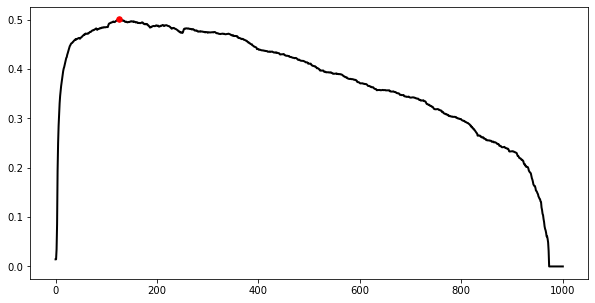

In [162]:
fig = plt.figure (figsize=(10, 5))
ax = plt.axes()

plt.plot(f1_low, linewidth=2.0, c="black", zorder=0)
ax.scatter (f1_low_float*1000, max(f1_low), s=30, c="red", zorder=1)

plt.show()

In [175]:
result['is_duplicate_predict'] = np.where((result['proba_1'] > f1_low_float), 1, 0)
result

,pair_id,name_1,name_2,is_duplicate,proba_0,proba_1,is_duplicate_predict
313708,313709,Ups De San Jose Sociedad Anonima,Inversionistas Y Distribuidores Sociedad Anoni...,0,0.996888,0.003112,0
83169,83170,"Rubchem India Pvt., Ltd.",Chemline India Ltd.,0,0.997136,0.002864,0
64665,64666,"Kwick Soft Solutions Pvt., Ltd.",Glideway Door Solutions,0,0.997674,0.002326,0
386982,386983,Ambrolink Trading,Stitchline Trading Llc,0,0.997171,0.002829,0
279256,279257,K Line Logistics (Usa.) Inc.,Shanghai Licang Logistics Co.,0,0.997565,0.002435,0
...,...,...,...,...,...,...,...
328279,328280,Micro Rubber Industries (P) Ltd.,Marco Rubber And Plastic Inc.,0,0.997632,0.002368,0
315351,315352,Izohan Sp Z O O,"Oldcastle Building Products, Inc.",0,0.998062,0.001938,0
306894,306895,Cosvan Ltda,Plasticos Agricolas Y Geomembranas,0,0.998062,0.001938,0
38055,38056,Leviton De Mexicos De Rl De Cv,Emmeti Sp A,0,0.998062,0.001938,0


<AxesSubplot:>

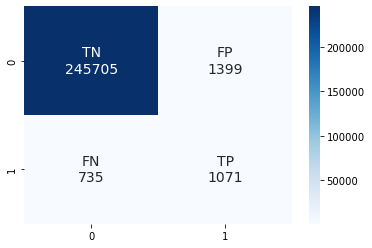

In [165]:
duplicate = result['is_duplicate']
duplicate_predict = result['is_duplicate_predict']

matrix_1 = confusion_matrix(duplicate, duplicate_predict)

group_names  = ['TN', 'FP', 'FN', 'TP']

group_counts = ["{0:0.0f}".format(value) for value in matrix_1.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(matrix_1, annot=labels, annot_kws={"fontsize":14}, fmt='', cmap='Blues')

In [166]:
print('f1 score', round(f1_score(duplicate, duplicate_predict), 4))
print('accuracy score', round(accuracy_score(duplicate, duplicate_predict), 4))
print('precision score', round(precision_score(duplicate, duplicate_predict), 4))
print('recall score', round(recall_score(duplicate, duplicate_predict), 4))

f1 score 0.5009
accuracy score 0.9914
precision score 0.4336
recall score 0.593


In [173]:
data_result = result

In [168]:
def check_answer(list1, list2):
    check = []
    for i in range(len(list1)):
        if list1[i] == list2[i]:
            check.append(list1[i])
        else:
            check.append('X')
    return check

In [169]:
def precision_at_5(list1, list2):
    count = 0
    for i in range(len(list1)):
        if list1[i] == list2[i]:
            count += 1
    return count/len(list1)

In [170]:
def avg_precision_at_5(list1, list2):
    count = 0
    summary = 0
    for i in range(len(list1)):
        if list1[i] == list2[i]:
            count += 1
            summary += count/(i+1)
    return summary/len(list1)

In [176]:
def matched_names(names_list):
    df = pd.DataFrame()
    for name in names_list:
        predict_1 = data_result[(data_result['name_1'] == name)]

        predict_2 = data_result[(data_result['name_2'] == name)]
        predict_2 = predict_2.rename(columns={'name_1': 'name_2', 'name_2': 'name_1'})

        predict = pd.concat([predict_1, predict_2])
        predict = predict.drop_duplicates()
        sum_duplicate = predict['is_duplicate'].sum()
        predict = predict.nlargest(5, ['proba_1'])
        
        find = [name]

        find.append(predict["name_2"].tolist())
        find.append(predict["is_duplicate"].tolist())
        find.append(predict["is_duplicate_predict"].tolist())
        
        is_duplicate_check = []
        for i in range(sum_duplicate):
            is_duplicate_check.append(1)
        for i in range(5-sum_duplicate):
            is_duplicate_check.append(0)
            
        is_duplicate_check = is_duplicate_check[0:len(predict["is_duplicate_predict"].tolist())]
        
        find.append(is_duplicate_check) 

        df_temp = pd.DataFrame(find)
        df_temp = df_temp.transpose()
        df_temp = df_temp.set_axis(['name', 
                                    'matched_names', 
                                    'is_duplicate', 
                                    'is_duplicate_predict', 
                                    'is_duplicate_check'], axis=1)
        
        df_temp['is_duplicate_check'] = df_temp.apply(lambda x: check_answer(x.is_duplicate_check, x.is_duplicate), axis=1)

        df_temp['p@5'] = df_temp.apply(lambda x: precision_at_5(x.is_duplicate_predict, x.is_duplicate_check), axis=1)
        df_temp['ap@5'] = df_temp.apply(lambda x: avg_precision_at_5(x.is_duplicate_predict, x.is_duplicate_check), axis=1)
        
        df = pd.concat([df, df_temp])

    return df

In [177]:
%%time

df_matched_names = matched_names(result["name_1"].unique().tolist())
df_matched_names

Wall time: 16min 1s


,name,matched_names,is_duplicate,is_duplicate_predict,is_duplicate_check,p@5,ap@5
0,Ups De San Jose Sociedad Anonima,"[Big Wave Sociedad Anonima, Dental Market Soci...","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",1.0,1.000000
0,"Rubchem India Pvt., Ltd.","[Jay Rubchem Private Ltd., Wuerth Industrial S...","[0, 0, 0, 0, 0]","[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",0.8,0.543333
0,"Kwick Soft Solutions Pvt., Ltd.","[Premier Logistics Solutions, Arris Solutions,...","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",1.0,1.000000
0,Ambrolink Trading,"[S K Trading Co., Alfa Trading, Central Tradin...","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",1.0,1.000000
0,K Line Logistics (Usa.) Inc.,"[S K Inc., Dahnay Logistics Usa Inc., Unico Lo...","[0, 0, 0, 0, 0]","[1, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",0.8,0.543333
...,...,...,...,...,...,...,...
0,"DELAVAL INTERNATIONAL AB""","[ЗАО ""ДЕЛАВАЛЬ""]",[1],[0],[1],0.0,0.000000
0,Kody Thompson,"[Oun Corporation, Sto Corp, Com. International...","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",1.0,1.000000
0,Mufat Nig Ltd.,"[Kmu Corp. S.A., Ktn]","[0, 0]","[0, 0]","[0, 0]",1.0,1.000000
0,Marine Roofing,[Dow Roofing Systems],[0],[1],[0],0.0,0.000000


In [178]:
mean_avg_precision_at_5  = df_matched_names['ap@5'].mean()
mean_avg_precision_at_5

0.9298874540529958